In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv("data.csv")

# Functions (helper)

In [2]:
# Auxiliary function for drawing the opinion charts
def _survey(results, categories):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(categories, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(categories), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

# Functions (main)

### API
* age_distribution
* experience
* consumption
* platform
* statements
* feature_set_1_opinion
* feature_set_2_opinion
* usage_general
* usage_paas
* opinion_interaction_1
* opinion_interaction_2

In [3]:
def age_distribution(data):
    age_groups = [
        data[data['Age'] == '18 or under'].shape[0],
        data[data['Age'] == '19-24'].shape[0],
        data[data['Age'] == '25-29'].shape[0],
        data[data['Age'] == '30-39'].shape[0],
        data[~data['Age'].isin(['18 or under', '19-24', '25-29', '30-39'])].shape[0]
    ]
    labels = ['18 or under', '19-24', '25-29', '30-39', '40+']
    explode = (0, 0.05, 0.05, 0, 0)
    colors = ['grey', '#99606a', '#964250', '#c2828d', '#cfc3b6']
    
    def func(pct, allvals):
        absolute = int(round(pct/100.*sum(allvals)))
        return f"n={absolute}"
    
    fig, ax = plt.subplots()
    ax.pie(age_groups, labels=labels, explode=explode, autopct=lambda pct: func(pct, age_groups), colors=colors)
    ax.set_title(f"Respondents' age distribution (n={sum(age_groups)})")

In [4]:
def experience(data):
    cols = ['15 years or more', '10-14 years', '6-9 years', 'Under 6 years']
    groups = [
        data[data['I have been using YouTube for...'] == cols[0]].shape[0],
        data[data['I have been using YouTube for...'] == cols[1]].shape[0],
        data[data['I have been using YouTube for...'] == cols[2]].shape[0],
        data[~data['I have been using YouTube for...'].isin(cols)].shape[0]
    ]
    colors = ['#964250', '#c2828d', '#cfc3b6', '#dbd3ca']
    
    fig, ax = plt.subplots()
    bars = ax.bar(cols, groups, color=colors, width=0.6)
    
    for bar, group in zip(bars, groups):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, group, ha='center', va='bottom')
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)
    ax.set_title('"I have been using YouTube for..."')
    ax.set_ylim(0, 30)

In [5]:
def consumption(data):
    labels = ['1-2 hours/day', '2+ hours/day', '0-1 hours/day', 'Few times/week', 'Less than once/week']
    consumption = [
        data[data['Select the option that best describes your YouTube consumption'] == labels[0]].shape[0],
        data[data['Select the option that best describes your YouTube consumption'] == labels[1]].shape[0],
        data[data['Select the option that best describes your YouTube consumption'] == labels[2]].shape[0],
        data[data['Select the option that best describes your YouTube consumption'] == labels[3]].shape[0],
        data[data['Select the option that best describes your YouTube consumption'] == labels[4]].shape[0],
    ]
    colors = ['#964250', '#99606a', '#c2828d', '#cfc3b6', 'grey']
    explode = [0.05, 0.05, 0.05, 0, 0]
    fig, ax = plt.subplots()
    ax.set_title("Select the option that best describes your YouTube consumption")
    ax.pie(consumption, labels=labels, explode=explode, autopct='%1.1f%%', colors=colors)

In [6]:
def platform(data):
    title = "When I use YouTube, I use it on a..."
    column_names = ["Smartphone", "Computer", "Smart TV", "Tablet", "Playstation", "Gaming console. ps5, ps4 etc."]
    df = pd.DataFrame(columns=column_names)
    for idx, row in data.iterrows():
        devices = row[title].split(";")
        values = [False, False, False, False, False, False]
        for i, col in enumerate(column_names):
            if col in devices:
                values[i] = True
        df.loc[idx] = values
    df['Gaming console'] = df['Playstation'] + df['Gaming console. ps5, ps4 etc.']
    df.drop(['Playstation', 'Gaming console. ps5, ps4 etc.'], axis=1, inplace=True)
    
    column_names = ['Smartphone', 'Computer', 'Smart TV', 'Tablet', 'Gaming console']
    devices = [
        df[df[column_names[0]]].shape[0],
        df[df[column_names[1]]].shape[0],
        df[df[column_names[2]]].shape[0],
        df[df[column_names[3]]].shape[0],
        df[df[column_names[4]]].shape[0],
    ]
    colors = ['#964250', '#99606a', '#c2828d', '#cfc3b6', 'grey']
    fig, ax = plt.subplots()
    ax.set_title(title)
    bars = plt.barh(column_names, devices, color=colors)
    for bar, device_count in zip(bars, devices):
        ax.text(bar.get_width()+1, bar.get_y() + bar.get_height()/2, device_count,
                ha='left', va='center', color='black')
    ax.set_xlim(0, 45)
    ax.set_xticks([])

In [7]:
def statements(data):
    q_1 = "From a user experience perspective, YouTube has gone in the right direction over the years."
    q_2 = "Whenever I discover a new feature on YouTube, I am mostly pleased by it."
    q_3 = "Sometimes the abundance of features makes it hard for me to find what I'm looking for."
    q_4 = "I would prefer to use a YouTube Lite* with less features over the current version of YouTube."
    q_5 = "In its current state, YouTube has too many features."
    categories = ["Strongly disagree", "Disagree", "No opinion", "Agree", "Strongly agree"]
    results = {
        q_1: [
            data[data[q_1] == 1].shape[0],
            data[data[q_1] == 2].shape[0],
            data[data[q_1] == 3].shape[0],
            data[data[q_1] == 4].shape[0],
            data[data[q_1] == 5].shape[0],
        ],
        q_2: [
            data[data[q_2] == 1].shape[0],
            data[data[q_2] == 2].shape[0],
            data[data[q_2] == 3].shape[0],
            data[data[q_2] == 4].shape[0],
            data[data[q_2] == 5].shape[0],
        ],
        q_3: [
            data[data[q_3] == 1].shape[0],
            data[data[q_3] == 2].shape[0],
            data[data[q_3] == 3].shape[0],
            data[data[q_3] == 4].shape[0],
            data[data[q_3] == 5].shape[0],
        ],
        q_4: [
            data[data[q_4] == 1].shape[0],
            data[data[q_4] == 2].shape[0],
            data[data[q_4] == 3].shape[0],
            data[data[q_4] == 4].shape[0],
            data[data[q_4] == 5].shape[0],
        ],
        q_5: [
            data[data[q_5] == 1].shape[0],
            data[data[q_5] == 2].shape[0],
            data[data[q_5] == 3].shape[0],
            data[data[q_5] == 4].shape[0],
            data[data[q_5] == 5].shape[0],
        ],
    }
    _survey(results, categories)

In [8]:
def feature_set_1_opinion(data):
    q_1 = "Dark/light theme"
    q_2 = "Location settings"
    q_3 = "Search with voice"
    q_4 = "Home feed with algorithm-based recommendations"
    q_5 = "Home feed filter"
    q_5 = "Infinite scrolling"
    q_6 = "Custom thumbnails"
    q_7 = "Video preview"
    q_8 = "Trending videos"
    
    categories = ["Essential", "Nice to have", "Unnecessary", "I haven't even heard of this"]
    
    results = {
        q_1: [
            data[data[q_1] == categories[0]].shape[0],
            data[data[q_1] == categories[1]].shape[0],
            data[data[q_1] == categories[2]].shape[0],
            data[data[q_1] == categories[3]].shape[0],
        ],
        q_2: [
            data[data[q_2] == categories[0]].shape[0],
            data[data[q_2] == categories[1]].shape[0],
            data[data[q_2] == categories[2]].shape[0],
            data[data[q_2] == categories[3]].shape[0],
        ],
        q_3: [
            data[data[q_3] == categories[0]].shape[0],
            data[data[q_3] == categories[1]].shape[0],
            data[data[q_3] == categories[2]].shape[0],
            data[data[q_3] == categories[3]].shape[0],
        ],
        q_4: [
            data[data[q_4] == categories[0]].shape[0],
            data[data[q_4] == categories[1]].shape[0],
            data[data[q_4] == categories[2]].shape[0],
            data[data[q_4] == categories[3]].shape[0],
        ],
        q_5: [
            data[data[q_5] == categories[0]].shape[0],
            data[data[q_5] == categories[1]].shape[0],
            data[data[q_5] == categories[2]].shape[0],
            data[data[q_5] == categories[3]].shape[0],
        ],
        q_6: [
            data[data[q_6] == categories[0]].shape[0],
            data[data[q_6] == categories[1]].shape[0],
            data[data[q_6] == categories[2]].shape[0],
            data[data[q_6] == categories[3]].shape[0],
        ],
        q_7: [
            data[data[q_7] == categories[0]].shape[0],
            data[data[q_7] == categories[1]].shape[0],
            data[data[q_7] == categories[2]].shape[0],
            data[data[q_7] == categories[3]].shape[0],
        ],
        q_8: [
            data[data[q_8] == categories[0]].shape[0],
            data[data[q_8] == categories[1]].shape[0],
            data[data[q_8] == categories[2]].shape[0],
            data[data[q_8] == categories[3]].shape[0],
        ],
    }
    _survey(results, categories)
    return results, categories

def _set_1_mean_response(results, categories):
    sums = [
        0,
        0,
        0,
        0
    ]
    for vals in results.values():
        sums[0] += vals[0]
        sums[1] += vals[1]
        sums[2] += vals[2]
        sums[3] += vals[3]
    for i, r in enumerate(sums):
        sums[i] = (r/len(results.keys()))/44
    rounded_values = np.round(np.array(sums) / sum(sums) * 100, decimals=2)
    colors = ['#d73027', '#fdae61', '#d9ef8b', '#1a9850']
    fig, ax = plt.subplots()
    bars = ax.bar(categories, sums, color=colors, width=0.6)
    for bar, group in zip(bars, rounded_values):
        n = f"{group}%"
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), n, ha='center', va='bottom')
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)
    ax.tick_params(axis='x', labelsize=8)
    #ax.set_ylim(0, 7)
    ax.set_title("Mean response")

In [9]:
def feature_set_2_opinion(data):
    q_1 = "Autoplay"
    q_2 = "Ambient mode"
    q_3 = "Automatically generated subtitles"
    q_4 = "Uploader submitted subtitles"
    q_5 = "Subtitle customization"
    q_6 = "Multiple audio tracks"
    q_12 = "Playback speed adjustment (with the preset values)"
    q_11 = "Playback speed adjustment (by providing a custom value, e.g. 1.45 instead of 1.5)"
    q_9 = '"Most replayed"'
    q_10 = "Video chapters"
    q_8 = "Clip"
    q_7 = "Keyboard shortcuts"
    q_13 = 'Livestream: separation between "Live chat" and "Top chat"'
    categories = ["Essential", "Nice to have", "Unnecessary", "I haven't even heard of this"]
    results = {}
    for q in [q_1, q_2, q_3, q_4, q_5, q_6, q_7, q_8, q_9, q_10, q_11, q_12, q_13]:
        results[q] = [data[data[q] == categories[i]].shape[0] for i in range(4)]
    _survey(results, categories)
    return results, categories

def _set_2_mean_response(results, categories):
    res = [0,0,0,0]
    for val in results.values():
        res[0] += val[0]
        res[1] += val[1]
        res[2] += val[2]
        res[3] += val[3]
    for i, r in enumerate(res):
        res[i] = (r/len(results.keys()))/44
    fig, ax = plt.subplots()
    colors = ['#d73027', '#fdae61', '#d9ef8b', '#1a9850']
    bars = ax.bar(categories, res, color=colors, width=0.6)
    rounded_values = np.round(np.array(res) / sum(res) * 100, decimals=2)
    
    for bar, group in zip(bars, rounded_values):
        n = f"{group}%"
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), n, ha='center', va='bottom')
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)
    ax.tick_params(axis='x', labelsize=8)
    #ax.set_ylim(0, 0.5)
    ax.set_title(f"Mean response")

In [10]:
def usage_general(data):
    categories = ["I actively use this feature", "I sometimes use this feature", "I never use this feature"]
    titles = ["Actively", "Sometimes", "Never"]
    qs = [
        "Watch queue",
        "Automatically generated mixes",
        "Subscription feed",
        "Subscription feed view customization",
        "Watch history",
        "Liked videos",
        "Playlists",
        "Collaborative playlists",
        '"Watch later"',
    ]
    results = {}
    for q in qs:
        results[q] = [data[data[q] == categories[i]].shape[0] for i in range(3)]
    _survey(results, titles)

def _avg_response(results):
    cumulative = [0, 0, 0]
    for r in results.values():
        cumulative[0] += r[0]
        cumulative[1] += r[1]
        cumulative[2] += r[2]
    cumulative = [v/sum(cumulative) for v in cumulative]
    
    rounded_values = np.round(np.array(cumulative) / sum(cumulative) * 100, decimals=2)
    colors = ['#d73027', '#d9ef8b', '#1a9850']
    fig, ax = plt.subplots()
    bars = ax.bar(titles, cumulative, color=colors, width=0.6)
    for bar, group in zip(bars, rounded_values):
        n = f"{group}%"
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), n, ha='center', va='bottom')
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)
    ax.tick_params(axis='x', labelsize=8)
    ax.set_title("The average response")

In [11]:
def usage_paas(data):
    categories = ["I actively use this feature", "I sometimes use this feature", "I never use this feature"]
    titles = ["Actively", "Sometimes", "Never"]
    
    qs = [
        "YouTube Shorts",
        "YouTube Premium",
        "YouTube Music",
        "YouTube Movies"
    ]
    
    results = {}
    for q in qs:
        results[q] = [data[data[q] == categories[i]].shape[0] for i in range(3)]
    _survey(results, titles)

In [12]:
def opinion_interaction_1(data):
    categories = ["Strongly disagree", "Disagree", "No opinion", "Agree", "Strongly agree"]
    qs = [
        "I spend more time on YouTube than I should because of the video recommendation algorithm.",
        "I often find myself endlessly scrolling the front page feed with no real purpose.",
        "The video thumbnail affects my decision to watch a video.",
        "The video preview feature affects my decision to watch a video.",
    ]
    results = {}
    for q in qs:
        results[q] = [data[data[q] == i].shape[0] for i in range(1,6)]
    _survey(results, categories)

In [13]:
def opinion_interaction_2(data):
    categories = ["Never", "Sometimes", "Often"]
    qs = [
        "I find myself skipping videos that have ads at the start or in the middle.",
        "I observe the public discussion on YouTube in the form of video comments, livestream chat or such.",
        "I engage in public discussion on YouTube in the form of video comments, livestream chat or such.",
    ]
    results = {}
    for q in qs:
        results[q] = [data[data[q] == categories[i]].shape[0] for i in range(3)]
    _survey(results, categories)

# Playground

In [14]:
def table_by_necessity(data):
    q_1 = "Autoplay"
    q_2 = "Ambient mode"
    q_3 = "Automatically generated subtitles"
    q_4 = "Uploader submitted subtitles"
    q_5 = "Subtitle customization"
    q_6 = "Multiple audio tracks"
    q_12 = "Playback speed adjustment (with the preset values)"
    q_11 = "Playback speed adjustment (by providing a custom value, e.g. 1.45 instead of 1.5)"
    q_9 = '"Most replayed"'
    q_10 = "Video chapters"
    q_8 = "Clip"
    q_7 = "Keyboard shortcuts"
    q_13 = 'Livestream: separation between "Live chat" and "Top chat"'
    
    categories = ["Essential", "Nice to have", "Unnecessary", "I haven't even heard of this"]
    
    results = {}
    for q in [q_1, q_2, q_3, q_4, q_5, q_6, q_7, q_8, q_9, q_10, q_11, q_12, q_13]:
        results[q] = {"Necessary": 0, "Unnecessary": 0}
        for response in data[q]:
            if response in ["Essential", "Nice to have"]:
                results[q]["Necessary"] += 1
            else:
                results[q]["Unnecessary"] += 1
    
    results_df = pd.DataFrame(results)
    results_df = results_df.T
    results_sorted = results_df.sort_values(by="Necessary", ascending=False)

In [15]:
frequent_users = data[~data['Select the option that best describes your YouTube consumption'].isin(['Few times/week', 'Less than once/week'])]
infrequent_users = data[data['Select the option that best describes your YouTube consumption'].isin(['Few times/week', 'Less than once/week'])]


#usage_general(frequent_users)
#usage_general(infrequent_users)
#usage_paas(frequent_users)
#usage_paas(infrequent_users)

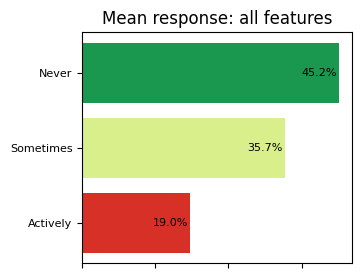

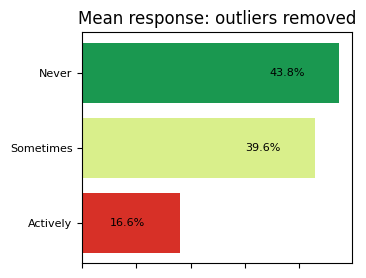

In [82]:
def get_usage_frequency_distribution(data, features):
    answers = {}
    for feature in features:
        rows = data[feature]
        for answer in rows:
            if not pd.isnull(answer):
                if not answers.get(feature):
                    answers[feature] = {
                            "I never use this feature": 0,
                            "I sometimes use this feature": 0,
                            "I actively use this feature": 0
                        }
                answers[feature][answer] += 1
    distribution = [0, 0, 0]
    for answer in answers.values():
        distribution[2] += answer["I never use this feature"]
        distribution[1] += answer["I sometimes use this feature"]
        distribution[0] += answer["I actively use this feature"]
    return distribution

def draw_mean_response(distribution, title):
    total = sum(distribution)
    percentages = [(value / total) * 100 for value in distribution]
    data = {
        'Frequency': ['Actively', 'Sometimes', 'Never'],
        'N': distribution
    }
    
    df = pd.DataFrame(data)
    df.set_index('Frequency', inplace=True)
    colors = ['#d73027', '#d9ef8b', '#1a9850']
    
    fig, ax = plt.subplots(figsize=(4, 3))
    bars = ax.barh(data['Frequency'], distribution, color=colors)
    
    for bar, group, perc in zip(bars, distribution, percentages):
        n = f"{perc:.1f}%"
        ax.text(bar.get_width()-26, bar.get_y() + bar.get_height()/2, n, va='center', ha='left', fontsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='x', which='both', left=False, labelbottom=False)
    ax.set_title(title)
    plt.subplots_adjust(right=0.8)
    plt.show()

features_all = [
    "Watch queue", "Automatically generated mixes",
    "Subscription feed", "Subscription feed view customization",
    "Watch history", "Liked videos",
    "Playlists", "Collaborative playlists", '"Watch later"'
]
features_excluded = [
    "Watch queue", "Automatically generated mixes",
    "Liked videos", "Playlists", '"Watch later"'
]

dis_all = get_usage_frequency_distribution(data, features_all)
dis_excluded = get_usage_frequency_distribution(data, features_excluded)

draw_mean_response(dis_all, "Mean response: all features")
draw_mean_response(dis_excluded, "Mean response: outliers removed")